In [4]:
import io
import numpy as np
import pandas as pd
from copy import deepcopy
from google.colab import files

In [5]:
uploaded = files.upload()


Saving isl_player_final.csv to isl_player_final.csv


In [6]:
isl_df = pd.read_csv(io.BytesIO(uploaded['isl_player_final.csv']))
isl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 93 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tour_id                                  563 non-null    int64  
 1   tour_name                                563 non-null    object 
 2   id                                       563 non-null    int64  
 3   jersey_no                                563 non-null    int64  
 4   name                                     563 non-null    object 
 5   short_name                               563 non-null    object 
 6   position_id                              563 non-null    int64  
 7   position                                 563 non-null    object 
 8   position_short                           563 non-null    object 
 9   team_id                                  563 non-null    int64  
 10  team_name                                563 non-n

In [7]:
isl_df[(isl_df["minutes_played"] > 1500) & (isl_df["country_id"] == 1)].shape

(49, 93)

In [8]:
isl_df[(isl_df["country_id"] == 1) & (isl_df["position_id"] == 2)].head()

,tour_id,tour_name,id,jersey_no,name,short_name,position_id,position,position_short,team_id,...,goaltenders.catches,goaltenders.punches,goaltenders.penalty_kicks.shots_faced,goaltenders.penalty_kicks.goals_allowed,goaltenders.penalty_kicks.saves,country_id,country_name,dob,player_foot,height
7,148,ISL6,3985,18,Thongkhosiem Haokip,Semboi Haokip,2,Forward,FWD,656,...,0,0,0,0,0,1,India,0000-00-00,NaN,0.0
45,148,ISL6,10702,16,Jayesh Dilip Rane,Jayesh Rane,2,Forward,FWD,499,...,0,0,0,0,0,1,India,2/20/1993,Right,175.0
57,148,ISL6,15877,15,Balwant Singh,Balwant Singh,2,Forward,FWD,499,...,0,0,0,0,0,1,India,12/15/1986,Right,180.0
66,148,ISL6,16576,23,Robin Singh,Robin Singh,2,Forward,FWD,1536,...,0,0,0,0,0,1,India,NaN,NaN,NaN
83,148,ISL6,19148,31,CK Vineeth,CK Vineeth,2,Forward,FWD,1159,...,0,0,0,0,0,1,India,5/20/1988,Right,178.0


In [9]:
indian_forwards = deepcopy(isl_df[(isl_df["country_id"] == 1) & (isl_df["position_id"] == 2)])

In [10]:
indian_forwards.reset_index(drop=True, inplace=True)

In [11]:
fwd_mins_df = indian_forwards.groupby(["id", "name"])["minutes_played"].sum().reset_index()

In [12]:
per90Cols = ["events.goals", "events.assists", "events.shots", "events.shots_on_target", "events.chances_created",
             "events.fouls_suffered", "touches.total", 'touches.aerial_duel.won']
for col in per90Cols:
    indian_forwards[col + "Per90"] = indian_forwards[col].divide(indian_forwards["minutes_played"]).multiply(90)

In [13]:
indian_forwards.head()


,tour_id,tour_name,id,jersey_no,name,short_name,position_id,position,position_short,team_id,...,player_foot,height,events.goalsPer90,events.assistsPer90,events.shotsPer90,events.shots_on_targetPer90,events.chances_createdPer90,events.fouls_sufferedPer90,touches.totalPer90,touches.aerial_duel.wonPer90
0,148,ISL6,3985,18,Thongkhosiem Haokip,Semboi Haokip,2,Forward,FWD,656,...,NaN,0.0,0.360000,0.000000,2.520000,0.720000,0.000000,3.600000,39.240000,1.440000
1,148,ISL6,10702,16,Jayesh Dilip Rane,Jayesh Rane,2,Forward,FWD,499,...,Right,175.0,0.099448,0.298343,0.994475,0.298343,1.292818,0.795580,46.342541,0.099448
2,148,ISL6,15877,15,Balwant Singh,Balwant Singh,2,Forward,FWD,499,...,Right,180.0,0.775862,0.000000,2.327586,0.775862,0.000000,0.775862,39.568966,3.879310
3,148,ISL6,16576,23,Robin Singh,Robin Singh,2,Forward,FWD,1536,...,NaN,NaN,0.170778,0.000000,1.878558,0.341556,1.024668,0.853890,37.912713,1.707780
4,148,ISL6,19148,31,CK Vineeth,CK Vineeth,2,Forward,FWD,1159,...,Right,178.0,0.163934,0.000000,1.967213,0.491803,0.327869,0.983607,33.934426,0.163934


In [14]:
cols_for_calc = []
for i in per90Cols:
    cols_for_calc.append(i + "Per90")
print(cols_for_calc)

['events.goalsPer90', 'events.assistsPer90', 'events.shotsPer90', 'events.shots_on_targetPer90', 'events.chances_createdPer90', 'events.fouls_sufferedPer90', 'touches.totalPer90', 'touches.aerial_duel.wonPer90']


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
indian_forwards[cols_for_calc] = scaler.fit_transform(indian_forwards[cols_for_calc])
indian_forwards.head()

,tour_id,tour_name,id,jersey_no,name,short_name,position_id,position,position_short,team_id,...,player_foot,height,events.goalsPer90,events.assistsPer90,events.shotsPer90,events.shots_on_targetPer90,events.chances_createdPer90,events.fouls_sufferedPer90,touches.totalPer90,touches.aerial_duel.wonPer90
0,148,ISL6,3985,18,Thongkhosiem Haokip,Semboi Haokip,2,Forward,FWD,656,...,NaN,0.0,0.131000,0.000000,0.084000,0.048000,0.000000,0.570000,0.081552,0.371200
1,148,ISL6,10702,16,Jayesh Dilip Rane,Jayesh Rane,2,Forward,FWD,499,...,Right,175.0,0.036188,0.049724,0.033149,0.019890,0.086188,0.125967,0.109821,0.025635
2,148,ISL6,15877,15,Balwant Singh,Balwant Singh,2,Forward,FWD,499,...,Right,180.0,0.282328,0.000000,0.077586,0.051724,0.000000,0.122845,0.082862,1.000000
3,148,ISL6,16576,23,Robin Singh,Robin Singh,2,Forward,FWD,1536,...,NaN,NaN,0.062144,0.000000,0.062619,0.022770,0.068311,0.135199,0.076270,0.440228
4,148,ISL6,19148,31,CK Vineeth,CK Vineeth,2,Forward,FWD,1159,...,Right,178.0,0.059654,0.000000,0.065574,0.032787,0.021858,0.155738,0.060436,0.042259


In [16]:
chet=indian_forwards.loc[(indian_forwards["id"] == 19150), cols_for_calc].sum()
chet


events.goalsPer90               0.339098
events.assistsPer90             0.016769
events.shotsPer90               0.164779
events.shots_on_targetPer90     0.137097
events.chances_createdPer90     0.132608
events.fouls_sufferedPer90      0.486511
touches.totalPer90              0.161714
touches.aerial_duel.wonPer90    0.506164
dtype: float64

In [17]:
calc_cols = indian_forwards[cols_for_calc]

calc_cols.head()

,events.goalsPer90,events.assistsPer90,events.shotsPer90,events.shots_on_targetPer90,events.chances_createdPer90,events.fouls_sufferedPer90,touches.totalPer90,touches.aerial_duel.wonPer90
0,0.131000,0.000000,0.084000,0.048000,0.000000,0.570000,0.081552,0.371200
1,0.036188,0.049724,0.033149,0.019890,0.086188,0.125967,0.109821,0.025635
2,0.282328,0.000000,0.077586,0.051724,0.000000,0.122845,0.082862,1.000000
3,0.062144,0.000000,0.062619,0.022770,0.068311,0.135199,0.076270,0.440228
4,0.059654,0.000000,0.065574,0.032787,0.021858,0.155738,0.060436,0.042259


In [18]:
dist=[]
for i, row in calc_cols.iterrows():
  sum_sq = np.sum(np.square(chet - row.values))
  dist.append(np.sqrt(sum_sq))
 

ed=pd.DataFrame(indian_forwards["name"])
ed["distance"]=dist
ed.head()


,name,distance
0,Thongkhosiem Haokip,0.327484
1,Jayesh Dilip Rane,0.699751
2,Balwant Singh,0.646780
3,Robin Singh,0.489586
4,CK Vineeth,0.668008


In [22]:
ed=ed.sort_values(by=['distance'])
ed.drop([50,39,49,15,52,28,5],inplace=True)
ed

,name,distance
14,Liston Colaco,0.326679
0,Thongkhosiem Haokip,0.327484
48,Leon Augustin,0.335432
13,Rahim Ali,0.410079
53,Devendra Murgaonkar,0.458524
16,Jobby Justin,0.477133
32,Manvir Singh,0.478925
6,Sumeet Passi,0.489560
3,Robin Singh,0.489586
37,Liston Colaco,0.534011


In [25]:
from numpy import average
#per90Cols = ["events.goals", "events.assists", "events.shots", "events.shots_on_target", "events.chances_created",
          #   "events.fouls_suffered", "touches.total", 'touches.aerial_duel.won']

wv=[1,0.9,0.7,0.85,0.7,0.65,0.5,0.5]

chet_wv = average(chet, weights = wv)
chet_wv

0.22914903850083476

In [29]:
wev=[]
for i,row in calc_cols.iterrows():
  wt_avg = average(row.values, weights = wv)
  wev.append(wt_avg)
 

w_avg=pd.DataFrame(indian_forwards["name"])
w_avg["Weighted Average"]=wev
w_avg.head()


,name,Weighted Average
0,Thongkhosiem Haokip,0.142668
1,Jayesh Dilip Rane,0.057067
2,Balwant Singh,0.172739
3,Robin Singh,0.089531
4,CK Vineeth,0.051949


In [31]:
w_avg=w_avg.sort_values(by=['Weighted Average'],ascending=False)
w_avg.drop([50,39,49,15,52,28,5],inplace=True)
w_avg

,name,Weighted Average
11,Komal Thatal,0.427818
54,Ishan Pandita,0.279626
41,Edmund Lalrindika,0.252033
45,Rohit Danu,0.198462
14,Liston Colaco,0.175072
2,Balwant Singh,0.172739
48,Leon Augustin,0.147347
0,Thongkhosiem Haokip,0.142668
37,Liston Colaco,0.133658
34,Komal Thatal,0.125831


Text(0, 0.5, 'Average')

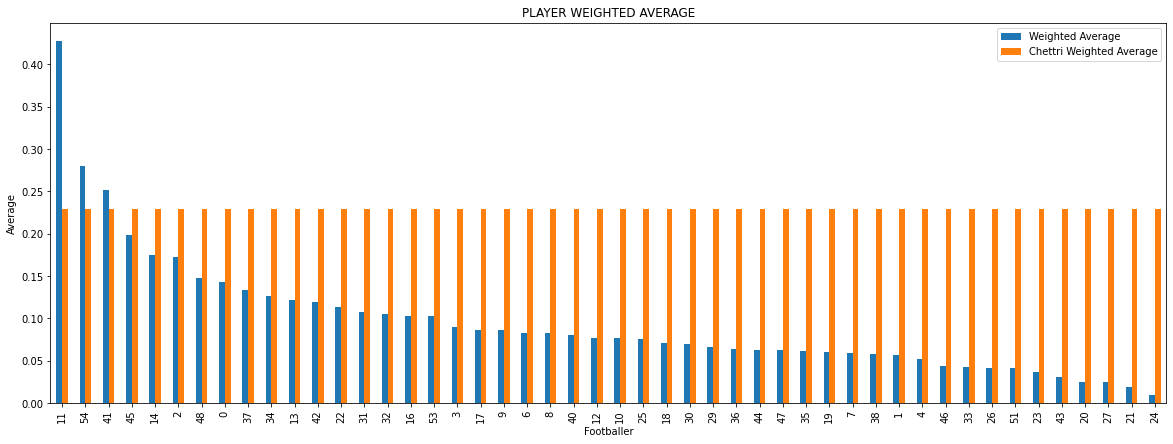

In [38]:
import matplotlib.pyplot as plt

wg=[]
for i in range(0,48):
  wg.append(chet_wv)
 

w_avg["Chettri Weighted Average"]=wg

w_avg.plot(kind="bar",figsize=(20, 7))

plt.title("PLAYER WEIGHTED AVERAGE")

plt.xlabel("Footballer")

plt.ylabel("Average")